## Plot experiment results

In [1]:
%matplotlib inline
from collections import OrderedDict
import numpy as np
from matplotlib import pyplot as plt


## Methods and filenames

In [2]:
runs = OrderedDict()

runs["truth"] = "truth_20200911_091636"
runs["mle"] = "mle_20200911_092100"
runs["random"] = "random_20200911_092105"
runs["greedy"] = "greedy_20200911_092116"
runs["beamsearch_s"] = "beamsearch_s_20200911_092125"
runs["beamsearch_m"] = ""
runs["beamsearch_l"] = ""
runs["beamsearch_xl"] = ""
runs["mcts_s"] = ""
runs["mcts_m"] = ""
runs["mcts_l"] = ""

runs["mcts_raw"] = ""
runs["mcts_onlybs"] = "mcts_only_bs_s_20200911_092709"
runs["mcts_nobs"] = ""
runs["mcts_random"] = ""
runs["mcts_likelihood"] = ""


In [3]:
labels = {}

labels["truth"] = "Truth"
labels["mle"] = "MLE"
labels["random"] = "Random"
labels["greedy"] = "Greedy"
labels["beamsearch_s"] = "Beam search 5"
labels["beamsearch_m"] = "Beam search 20"
labels["beamsearch_l"] = "Beam search 100"
labels["beamsearch_xl"] = "Beam search 1k"
labels["mcts_s"] = "MCTS 5"
labels["mcts_m"] = "MCTS 20"
labels["mcts_l"] = "MCTS 100"


In [4]:
labels_alt = {}

labels_alt["greedy"] = "Greedy"
labels_alt["beamsearch_s"] = "Beam search"
labels_alt["mcts_s"] = "MCTS"

labels_alt["mcts_raw"] = "MCTS (no likelihood feature)"
labels_alt["mcts_onlybs"] = "MCTS (no PUCT roll-out)"
labels_alt["mcts_nobs"] = "MCTS (no BS initialization)"
labels_alt["mcts_random"] = "MCTS (random policy)"
labels_alt["mcts_likelihood"] = "MCTS (likelihood policy)"


In [5]:
colors = {}

colors["truth"] = "black"
colors["mle"] = "black"
colors["random"] = "0.65"
colors["greedy"] = "C0"
colors["beamsearch_s"] = "C1"
colors["beamsearch_m"] = "C1"
colors["beamsearch_l"] = "C1"
colors["beamsearch_xl"] = "C1"
colors["mcts_s"] = "C3"
colors["mcts_m"] = "C3"
colors["mcts_l"] = "C3"

colors["mcts_raw"] = "0.0"
colors["mcts_onlybs"] = "0.2"
colors["mcts_nobs"] = "0.4"
colors["mcts_random"] = "0.6"
colors["mcts_likelihood"] = "0.8"


In [6]:
linestyles = {}

linestyles["truth"] = "--"
linestyles["mle"] = "-"
linestyles["random"] = ":"
linestyles["greedy"] = "-"
linestyles["beamsearch_s"] = ":"
linestyles["beamsearch_m"] = "--"
linestyles["beamsearch_l"] = "-"
linestyles["beamsearch_xl"] = "-."
linestyles["mcts_s"] = ":"
linestyles["mcts_m"] = "--"
linestyles["mcts_l"] = "-"


In [7]:
linestyles_alt = {}

linestyles_alt["greedy"] = "-"
linestyles_alt["beamsearch_s"] = "-"
linestyles_alt["mcts_s"] = "-"

linestyles_alt["mcts_raw"] = ":"
linestyles_alt["mcts_onlybs"] = "-."
linestyles_alt["mcts_nobs"] = "--"
linestyles_alt["mcts_random"] = ":"
linestyles_alt["mcts_likelihood"] = "--"


## Load results

In [8]:
n_jets = 500
run_dir = "./data/runs"

jet_sizes = np.nan * np.ones(n_jets)
log_likelihoods = {}

for key, run in runs.items():
    try:
        log_likelihoods[key] = np.load(f"{run_dir}/{run}/eval_log_likelihood.npy").flatten()
        jet_sizes = np.load(f"{run_dir}/{run}/eval_jet_sizes.npy")
    except Exception as e:
        print(e)
        log_likelihoods[key] = np.nan * np.ones(n_jets)
        pass


[Errno 2] No such file or directory: './data/runs//eval_log_likelihood.npy'
[Errno 2] No such file or directory: './data/runs//eval_log_likelihood.npy'
[Errno 2] No such file or directory: './data/runs//eval_log_likelihood.npy'
[Errno 2] No such file or directory: './data/runs//eval_log_likelihood.npy'
[Errno 2] No such file or directory: './data/runs//eval_log_likelihood.npy'
[Errno 2] No such file or directory: './data/runs//eval_log_likelihood.npy'
[Errno 2] No such file or directory: './data/runs//eval_log_likelihood.npy'
[Errno 2] No such file or directory: './data/runs//eval_log_likelihood.npy'
[Errno 2] No such file or directory: './data/runs//eval_log_likelihood.npy'
[Errno 2] No such file or directory: './data/runs//eval_log_likelihood.npy'


## Normalize results

In [9]:
norm_key = "greedy"
rel_log_likelihoods = {}

for key, val in log_likelihoods.items():
    rel_log_likelihoods[key] = val - log_likelihoods[norm_key]


## Bin results

In [16]:
# n_bins = 5
# bin_boundaries = np.percentile(jet_sizes, np.linspace(0., 100., n_bins + 1)).astype(np.float)
# bin_boundaries[0] -= 0.01
# bin_boundaries[-1] += 0.01
bin_boundaries = [1.5] + list(np.arange(7.5, 17, 2)) + [20.5]


In [17]:
bin_jet_size = {}
bin_log_likelihood = {}
bin_log_likelihood_err = {}

for key in runs.keys():
    bin_jet_size_ = []
    bin_log_likelihood_ = []
    bin_log_likelihood_err_ = []
    
    for bin_min, bin_max in zip(bin_boundaries[:-1], bin_boundaries[1:]):
        x = jet_sizes[(jet_sizes >= bin_min) * (jet_sizes < bin_max)]
        y = rel_log_likelihoods[key][(jet_sizes >= bin_min) * (jet_sizes < bin_max)]
        bin_jet_size_.append(np.mean(x))
        bin_log_likelihood_.append(np.mean(y))
        bin_log_likelihood_err_.append(np.std(y) / (len(x)**0.5 + 1.e-9))
        
    bin_jet_size[key] = np.asarray(bin_jet_size_)
    bin_log_likelihood[key] = np.asarray(bin_log_likelihood_)
    bin_log_likelihood_err[key] = np.asarray(bin_log_likelihood_err_)


## Plot results

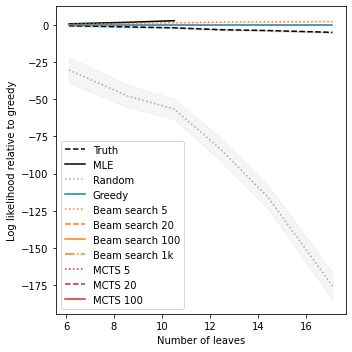

In [18]:
plot = ["truth", "mle", "random", "greedy", "beamsearch_s", "beamsearch_m", "beamsearch_l", "beamsearch_xl", "mcts_s", "mcts_m", "mcts_l"]

fig = plt.figure(figsize=(5,5))
    
for key in plot:
    x, y, dy = bin_jet_size[key], bin_log_likelihood[key], bin_log_likelihood_err[key]
    c, ls, lbl = colors[key], linestyles[key], labels[key]

    plt.fill_between(x, y-dy, y+dy, color=c, alpha=0.1)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend()

plt.xlabel("Number of leaves")
plt.ylabel(f"Log likelihood relative to {norm_key}")

plt.tight_layout()
plt.savefig("figures/rl_ginkgo_log_likelihood_all.pdf")


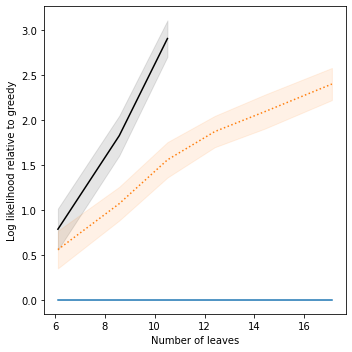

In [19]:
plot = ["mle", "greedy", "beamsearch_s", "beamsearch_m", "beamsearch_l", "beamsearch_xl", "mcts_s", "mcts_m", "mcts_l"]

fig = plt.figure(figsize=(5,5))
    
for key in plot:
    x, y, dy = bin_jet_size[key], bin_log_likelihood[key], bin_log_likelihood_err[key]
    c, ls, lbl = colors[key], linestyles[key], labels[key]

    plt.fill_between(x, y-dy, y+dy, color=c, alpha=0.1)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

#plt.legend()

plt.xlabel("Number of leaves")
plt.ylabel(f"Log likelihood relative to {norm_key}")

plt.tight_layout()
plt.savefig("figures/rl_ginkgo_log_likelihood_zoom.pdf")


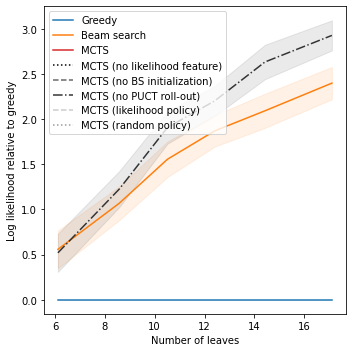

In [20]:
plot = ["greedy", "beamsearch_s", "mcts_s", "mcts_raw", "mcts_nobs", "mcts_onlybs", "mcts_likelihood", "mcts_random"]

fig = plt.figure(figsize=(5,5))
    
for key in plot:
    x, y, dy = bin_jet_size[key], bin_log_likelihood[key], bin_log_likelihood_err[key]
    c, ls, lbl = colors[key], linestyles_alt[key], labels_alt[key]

    plt.fill_between(x, y-dy, y+dy, color=c, alpha=0.1)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend()
plt.xlabel("Number of leaves")
plt.ylabel(f"Log likelihood relative to {norm_key}")

plt.tight_layout()
plt.savefig("figures/rl_ginkgo_log_likelihood_ablation.pdf")
